In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Импорт библиотек и данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from yellowbrick.regressor import ResidualsPlot


In [3]:
directory = "/content/gdrive/MyDrive/датасеты/vgsales.csv"

In [4]:
df = pd.read_csv(directory)

# Подготовка данных

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Удаление пропусков

In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Рассмотрим распредление столбца Year

<ipython-input-8-99e1b8bded6b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Year'], shade=True, color='violet')


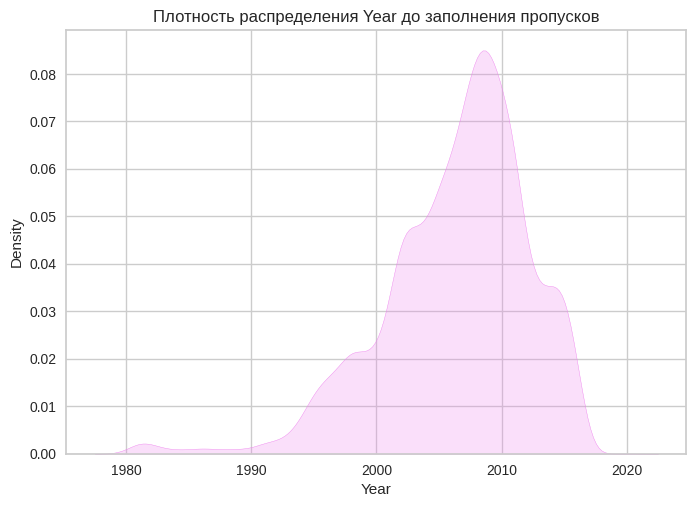

In [8]:
sns.kdeplot(df['Year'], shade=True, color='violet')
plt.title('Плотность распределения Year до заполнения пропусков')
plt.show()

Заполним пропуски наиболее встречающимся значением

In [9]:
df['Year'].fillna(df['Year'].mode()[0], inplace=True)

Убедимся, что распредление не изменилось

<ipython-input-10-9208b9cb157b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Year'], shade=True, color='violet')


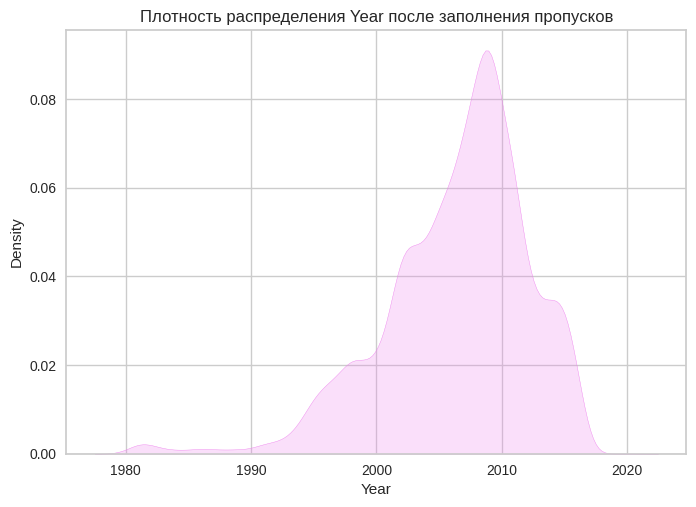

In [10]:
sns.kdeplot(df['Year'], shade=True, color='violet')
plt.title('Плотность распределения Year после заполнения пропусков')
plt.show()

In [11]:
df['Year'].isnull().sum()

0

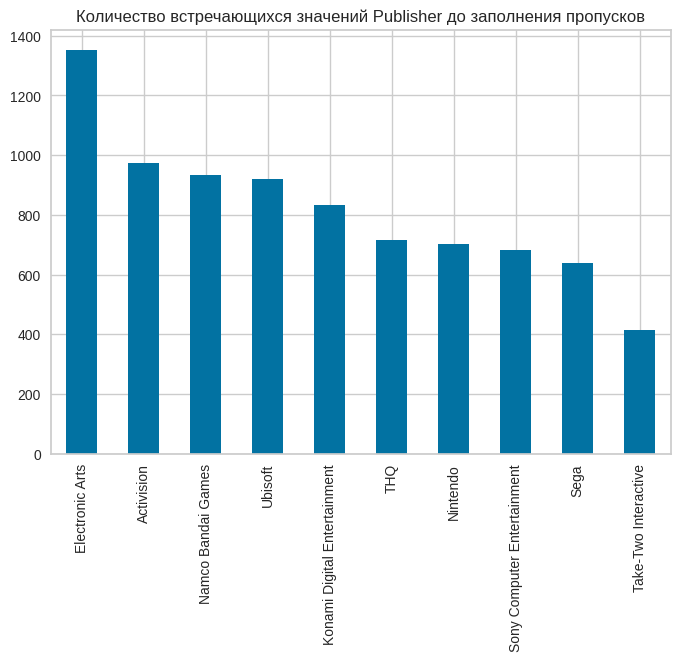

In [12]:
value_counts = df['Publisher'].value_counts().nlargest(10)
value_counts.plot(kind='bar')
plt.title('Количество встречающихся значений Publisher до заполнения пропусков')
plt.show()

Пропущенные значения столбца Publisher заполним наиболее встречающимся значением

In [13]:
df['Publisher'].fillna(df['Publisher'].mode()[0],inplace=True)

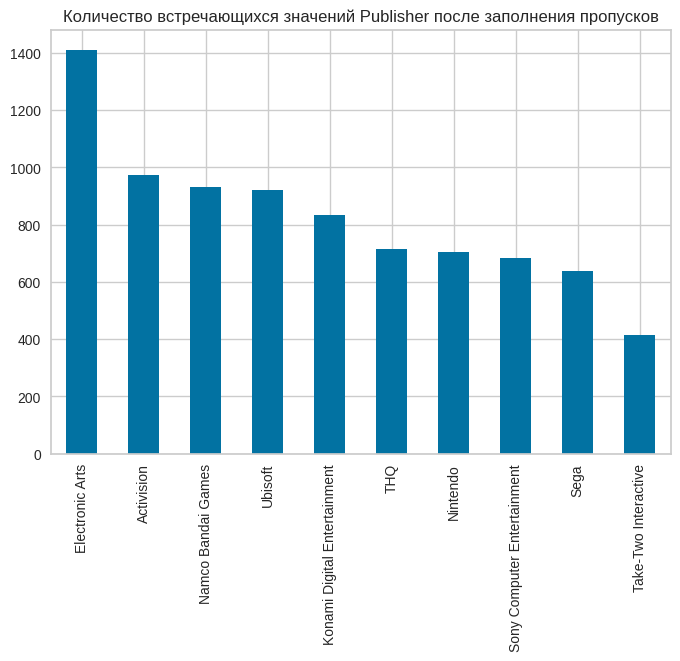

In [14]:
value_counts = df['Publisher'].value_counts().nlargest(10)
value_counts.plot(kind='bar')
plt.title('Количество встречающихся значений Publisher после заполнения пропусков')
plt.show()

In [15]:
df['Publisher'].isnull().sum()

0

In [16]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Пропусков в данных не осталось

## Проверка на дубликаты

In [17]:
duplicates = df.duplicated()
print(len(df[duplicates]))

0


Дубликаты в данных отсутсвуют

## Преобразование столбца Year

In [18]:
df['Year'] = df['Year'].astype(int)

## Удаление наличие выбросов

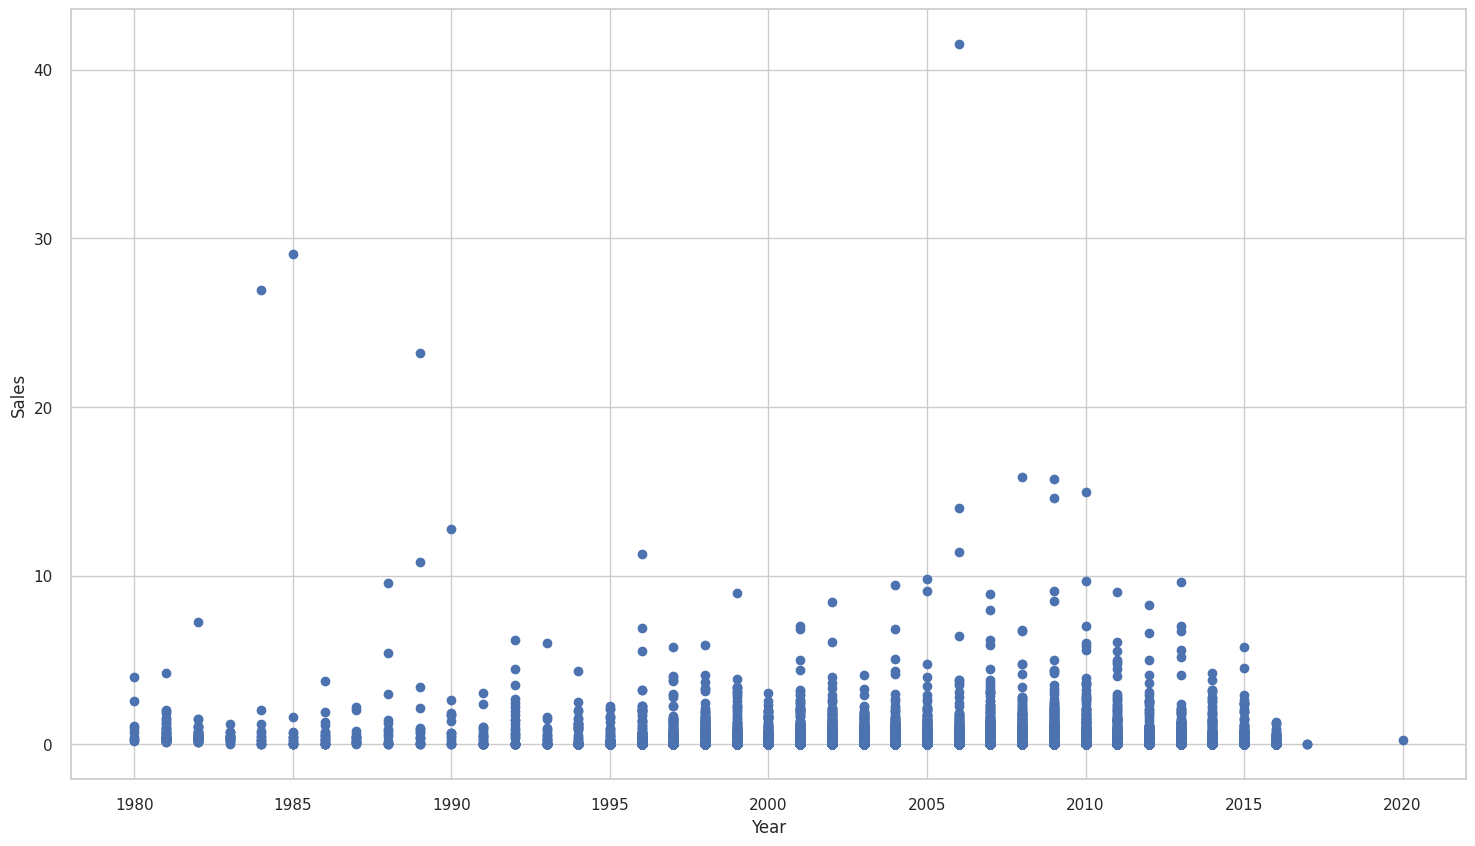

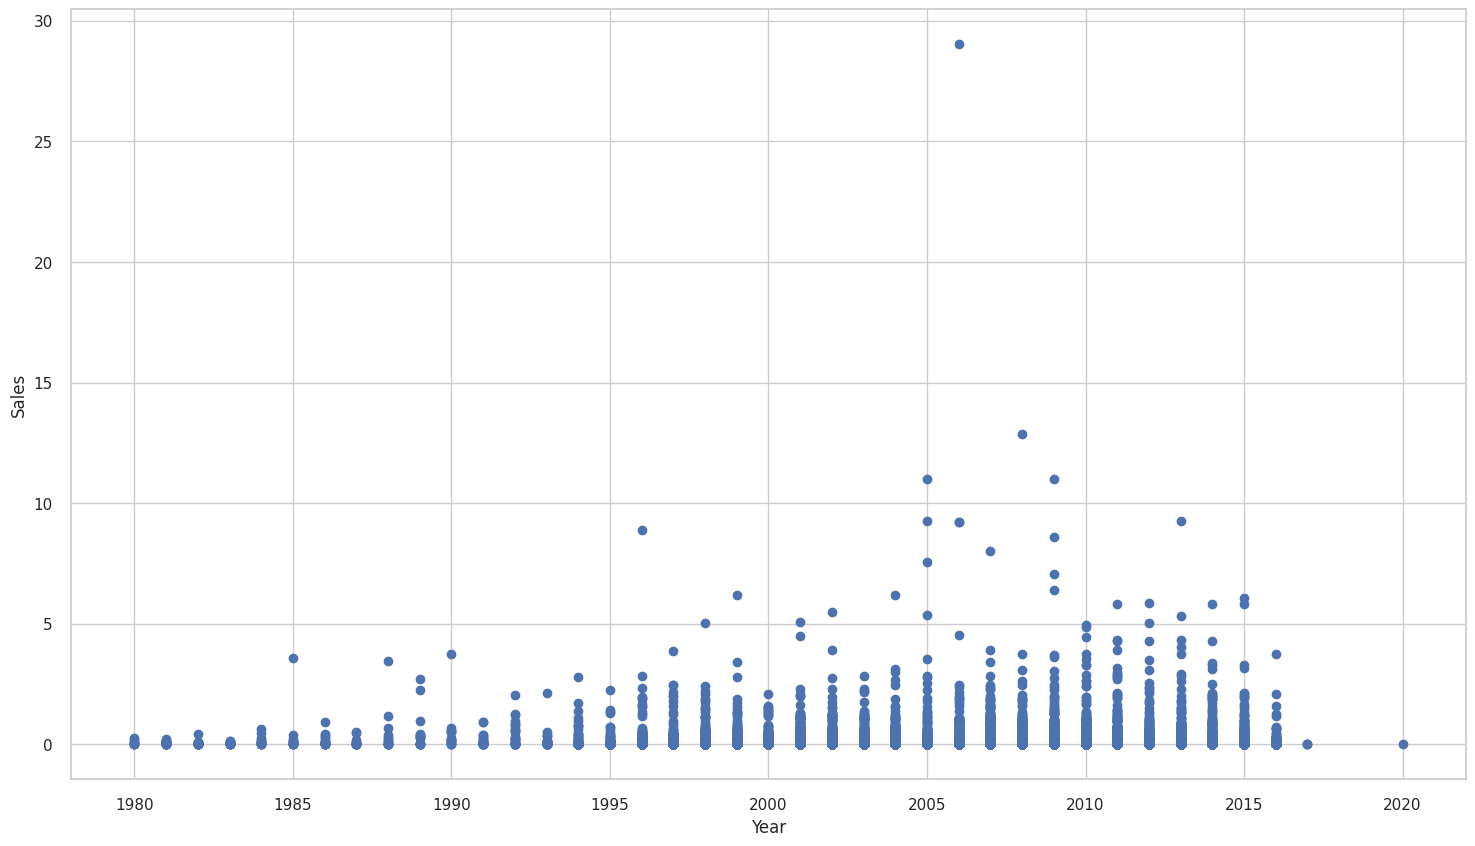

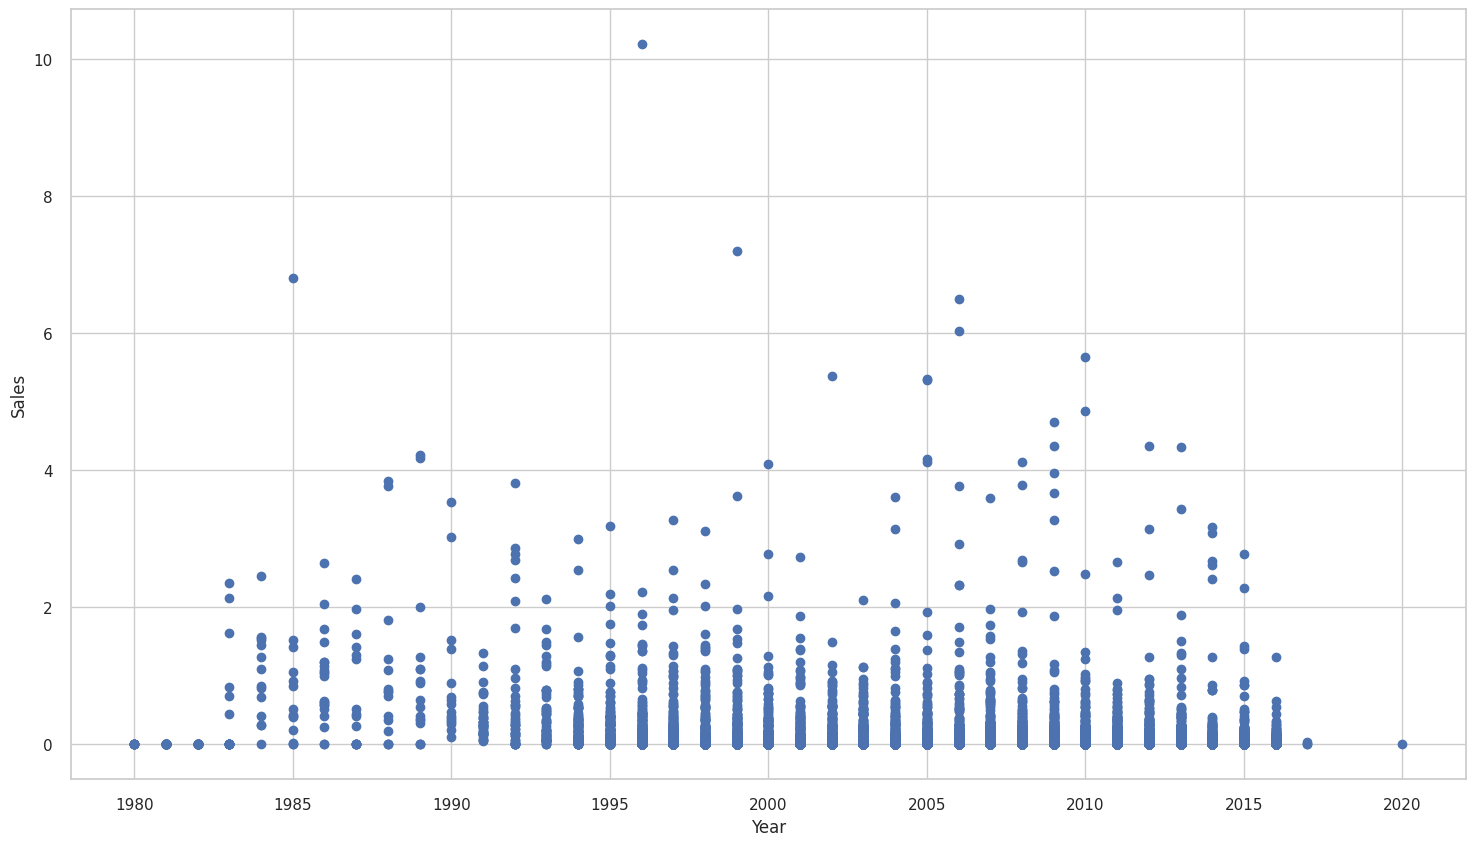

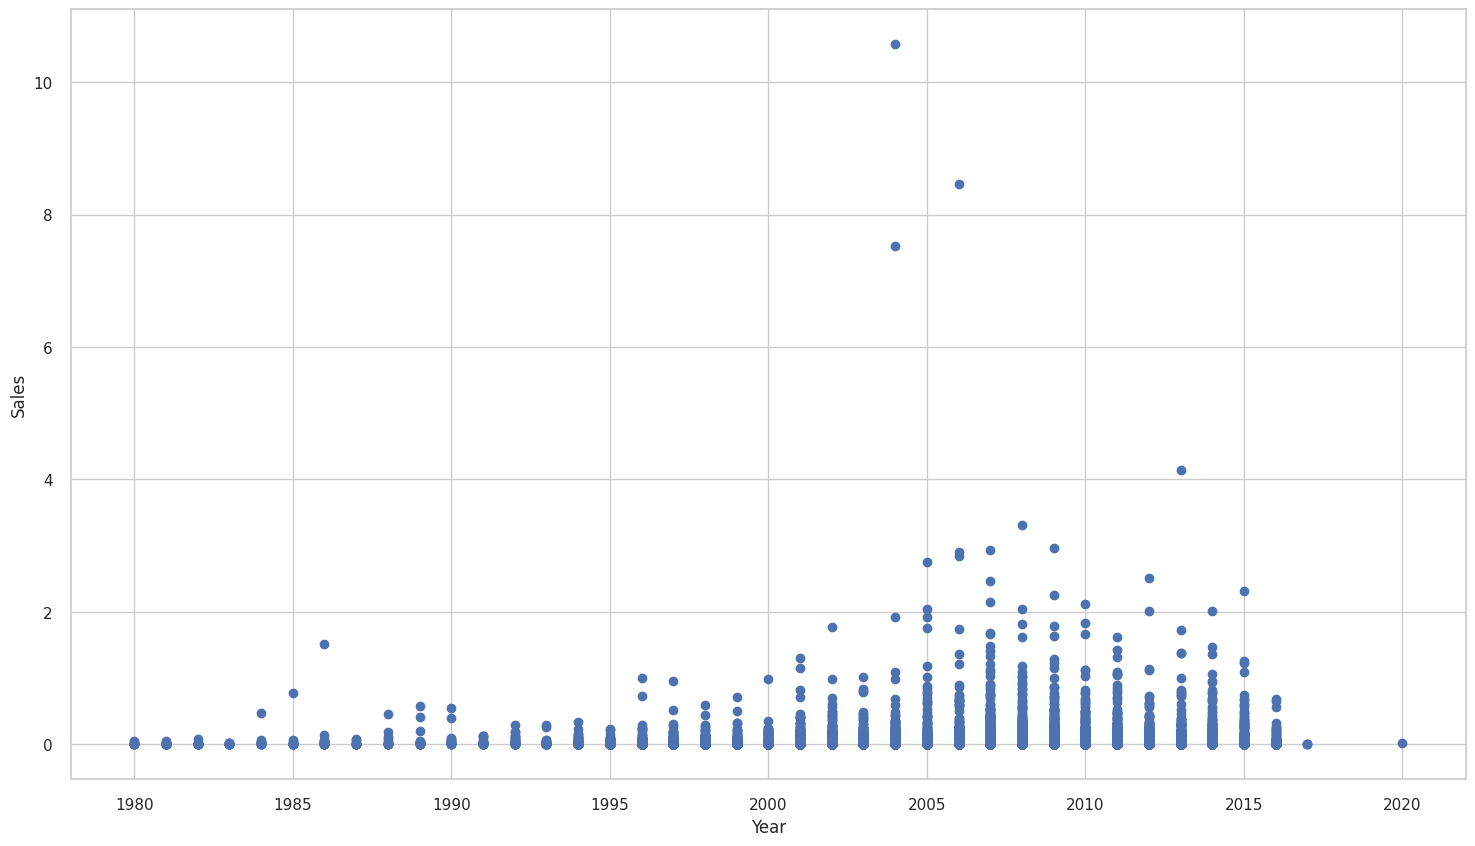

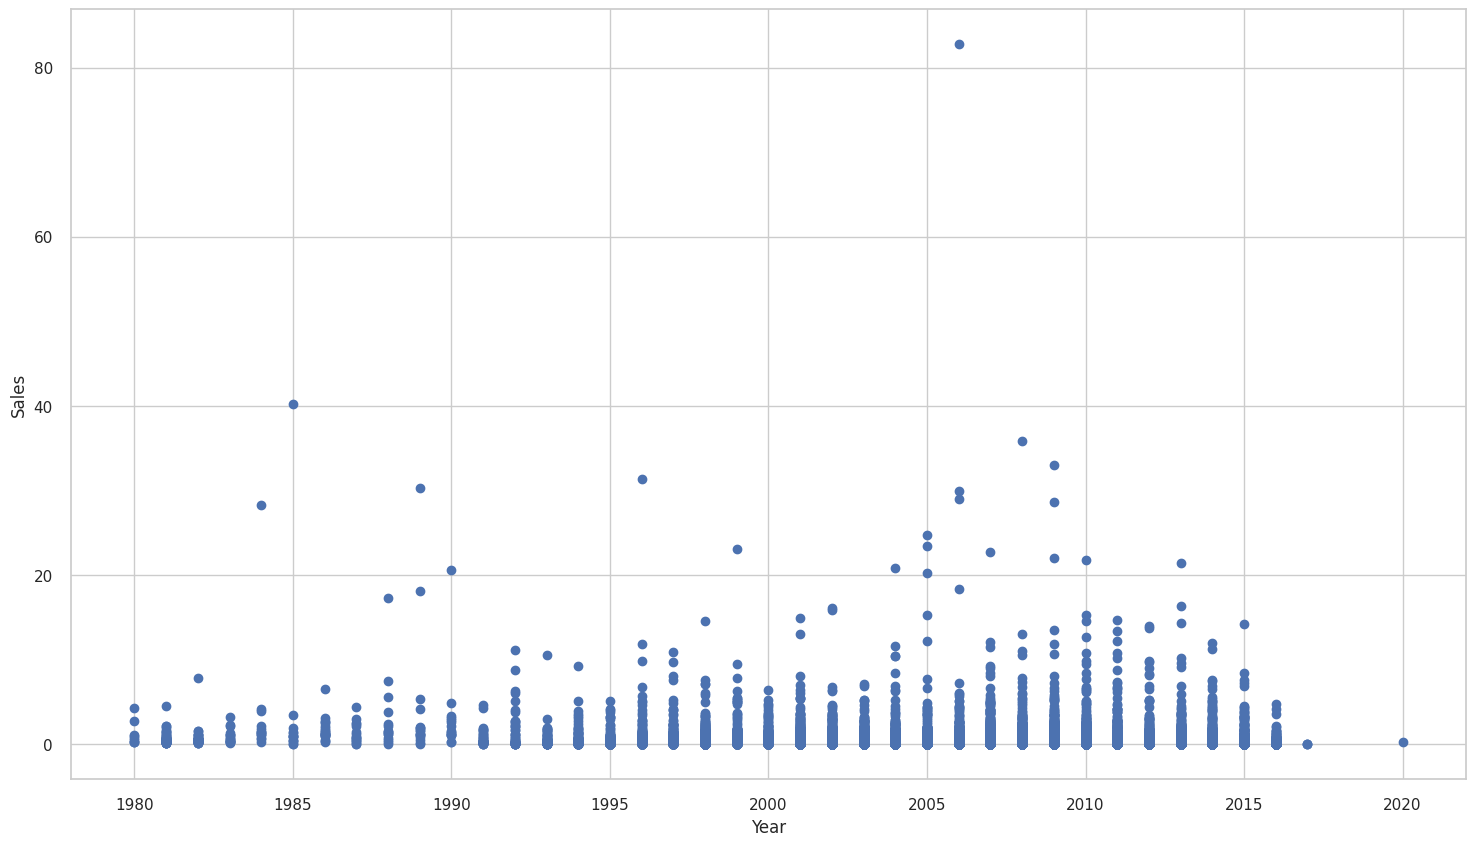

In [19]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for column in columns:
    # Создание отдельной фигуры для каждой колонки
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize = (18,10))
    ax.scatter(df['Year'], df[column])
 
    # x-axis label
    ax.set_xlabel('Year')
 
    # y-axis label
    ax.set_ylabel('Sales')
    plt.show()

In [20]:
df = df.drop(df[df['NA_Sales'] > 20].index)
df = df.drop(df[df['EU_Sales'] > 20].index)
df = df.drop(df[df['JP_Sales'] > 8].index)
df = df.drop(df[df['Other_Sales'] > 6].index)

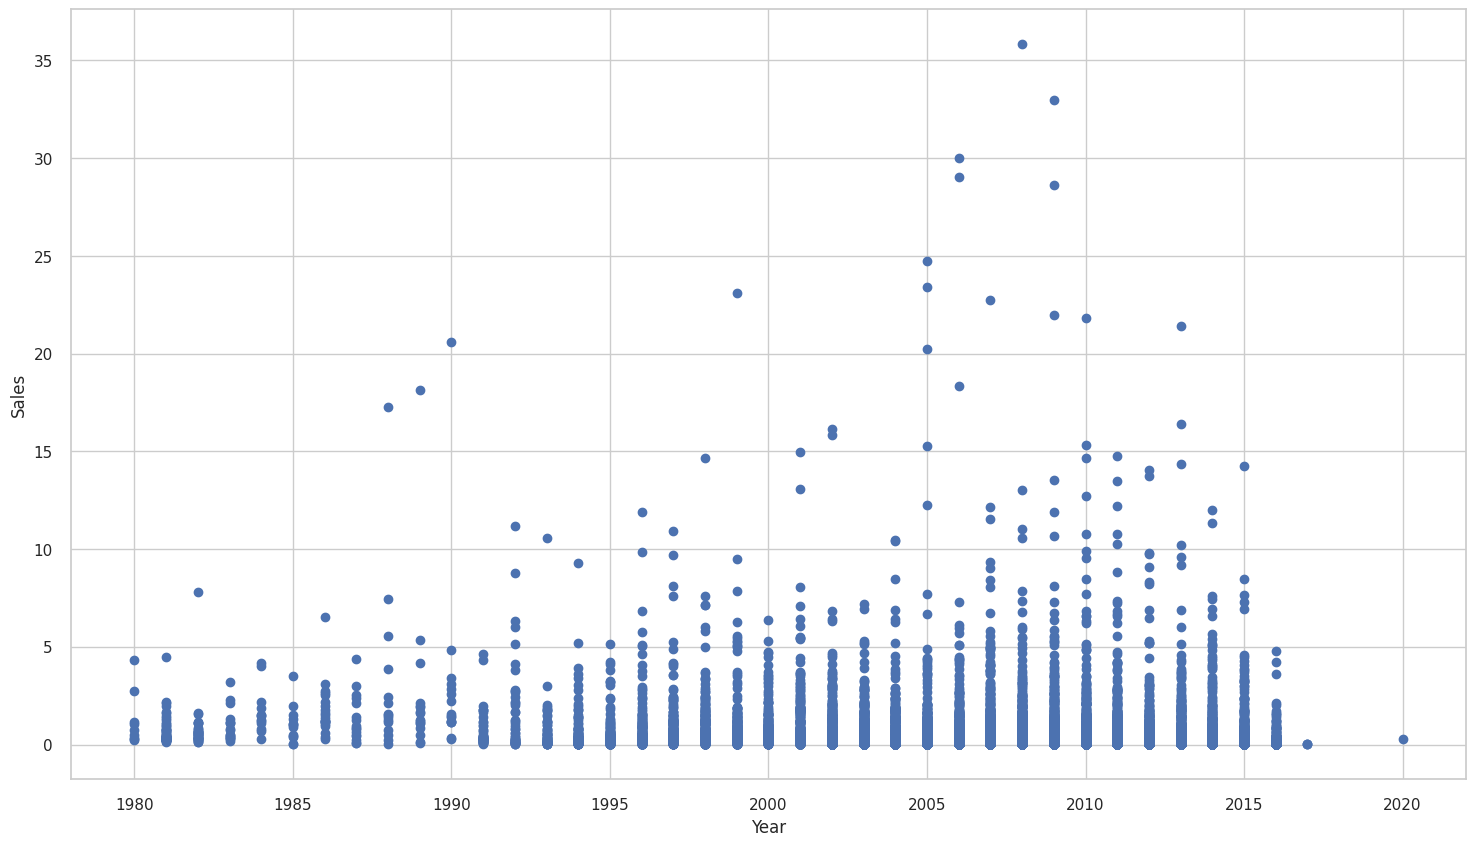

In [21]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['Year'], df['Global_Sales'])
 
# x-axis label
ax.set_xlabel('Year')

# y-axis label
ax.set_ylabel('Sales')
plt.show()

## Общая информация о датасете

In [22]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000
mean,8304.101983,2006.453439,0.256075,0.144014,0.076199,0.046312,0.522877
std,4789.839097,5.784516,0.653682,0.446791,0.291270,0.145433,1.314276
min,3.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4156.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8304.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12451.500000,2010.000000,0.240000,0.110000,0.040000,0.035000,0.470000
max,16600.000000,2020.000000,15.850000,12.880000,7.200000,4.140000,35.820000


In [23]:
df.shape

(16591, 11)

In [24]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


# Визуализация данных

## Жанр лидирующий по продажам

### Круговая диаграмма доли продаж по жанрам

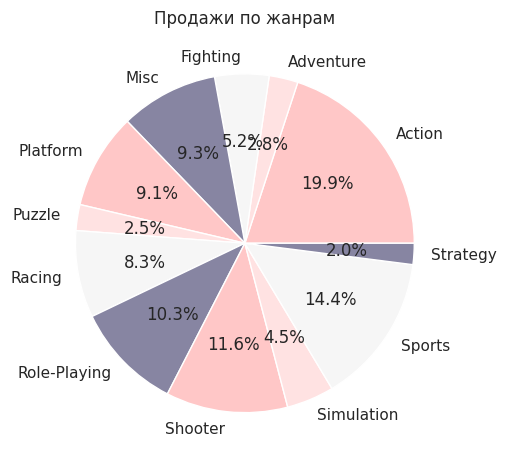

In [25]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum()
colors = ['#FFC7C7', '#FFE2E2', '#F6F6F6', '#8785A2']
plt.pie(genre_sales, labels=genre_sales.index, autopct='%1.1f%%', colors=colors)
plt.title('Продажи по жанрам')
plt.show()

### Столбчатая диаграмма самых популяных игр самого продаваемого жанра - Action

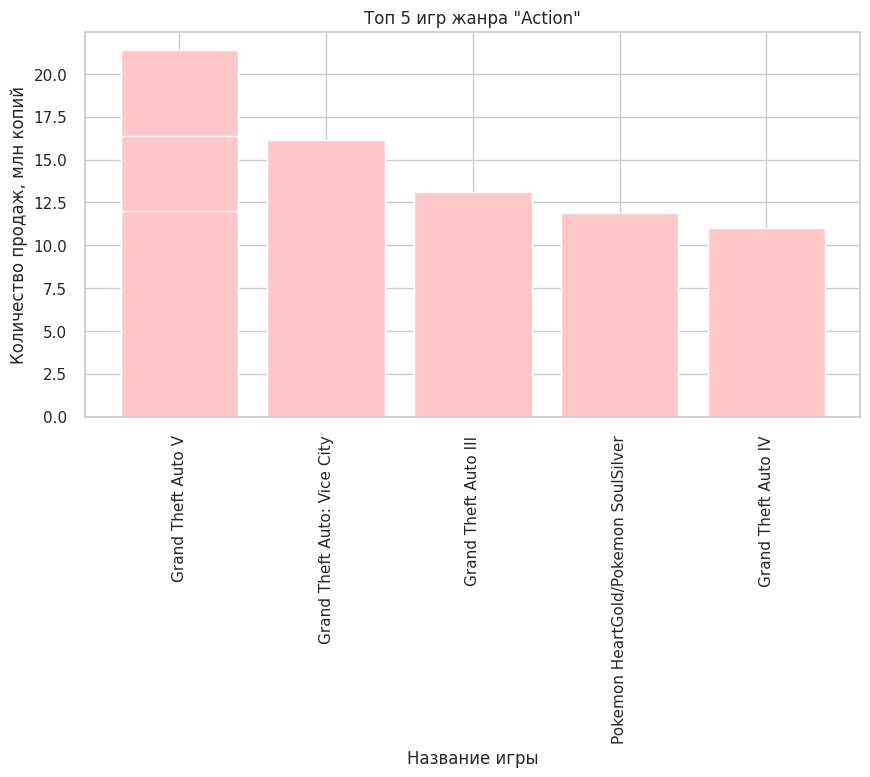

In [26]:
df_genre = df[df['Genre'] == 'Action']
top_5 = df_genre.nlargest(7, 'Global_Sales')

plt.figure(figsize=(10, 5))
plt.bar(top_5['Name'], top_5['Global_Sales'], color='#FFC7C7')
plt.title('Топ 5 игр жанра "Action"')
plt.xlabel('Название игры')
plt.ylabel('Количество продаж, млн копий')
plt.xticks(rotation=90)
plt.show()

### Столбчатая диаграмма компаний выпустиших игры самого продаваемого жанра - Action

<ipython-input-27-7668c6eb5b9e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10 = df_genre.groupby('Publisher').sum().nlargest(10, 'Global_Sales')


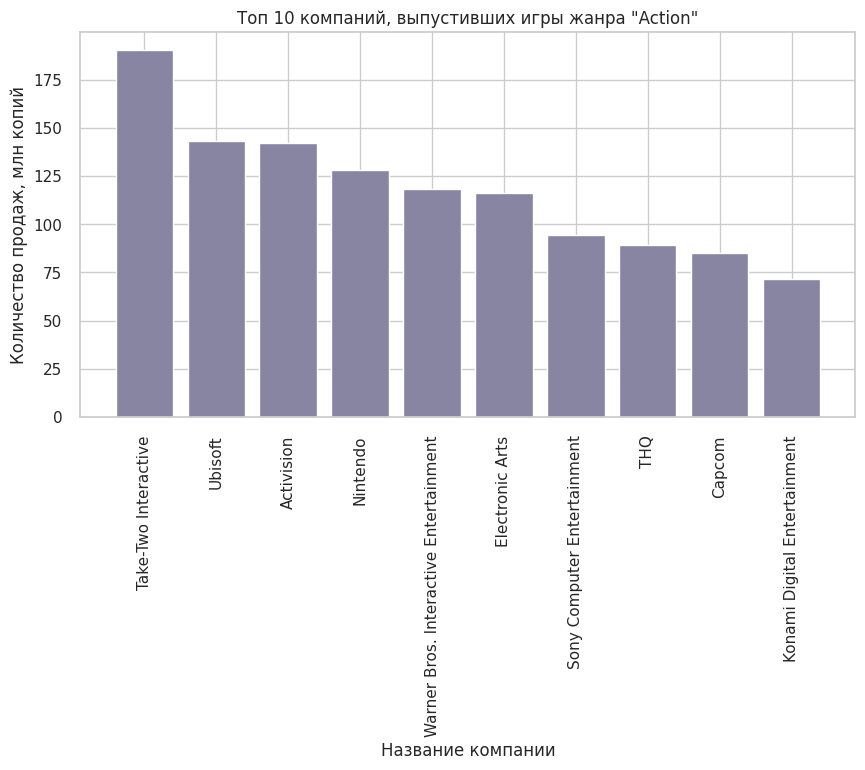

In [27]:
top_10 = df_genre.groupby('Publisher').sum().nlargest(10, 'Global_Sales')

# создаем график
plt.figure(figsize=(10, 5))
plt.bar(top_10.index, top_10['Global_Sales'], color='#8785A2')
plt.title('Топ 10 компаний, выпустивших игры жанра "Action"')
plt.xlabel('Название компании')
plt.ylabel('Количество продаж, млн копий')
plt.xticks(rotation=90)
plt.show()

Видим, что лидирует жанр экшн игр, среди которых в топе продаж: GTA V, GTA San Andreas, GTA Vice City, GTA III, Pockemon.
Компании выпускающие игры в данном жанре: Take-Two Interactive, Ubisoft, Activision, Nintendo, Warner Bros. и прочие

## Регион лидирующий по продажам

### Круговая диаграмма доли продаж по регионам

<ipython-input-28-a7f152040139>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_year = df.groupby('Year').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]


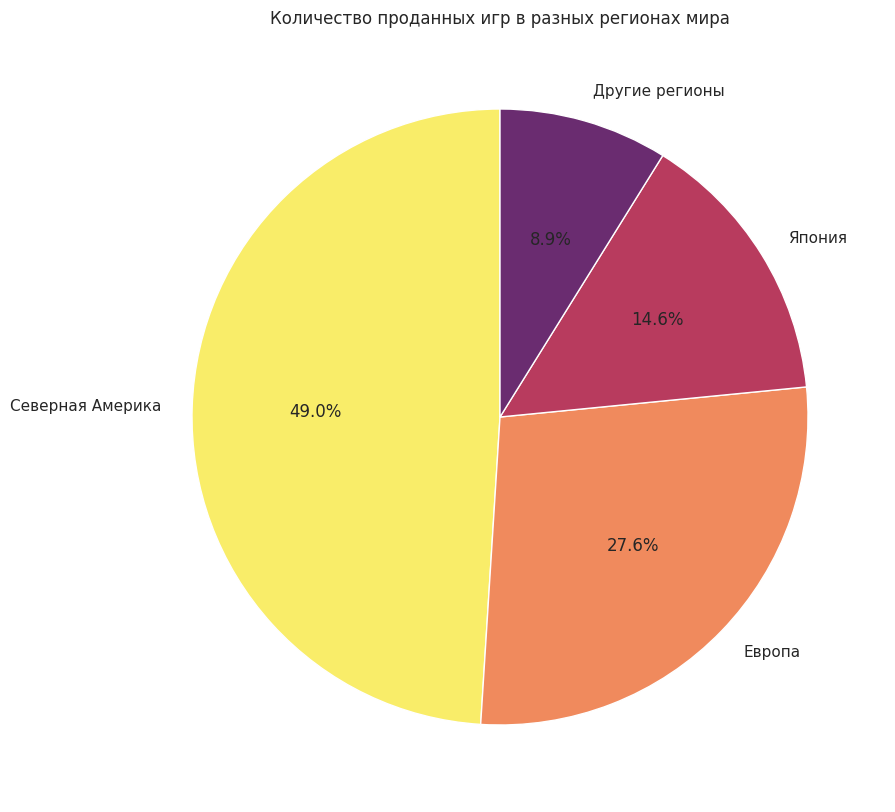

In [28]:
sales_by_year = df.groupby('Year').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales_by_year.columns = ['Северная Америка', 'Европа', 'Япония', 'Другие регионы']
colors = ['#F9ED69', '#F08A5D', '#B83B5E', '#6A2C70']
plt.figure(figsize=(10, 10))
plt.pie(sales_by_year.sum(), labels=sales_by_year.columns, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Количество проданных игр в разных регионах мира')
plt.show()

### Тепловая карта продаж по регионам и годам

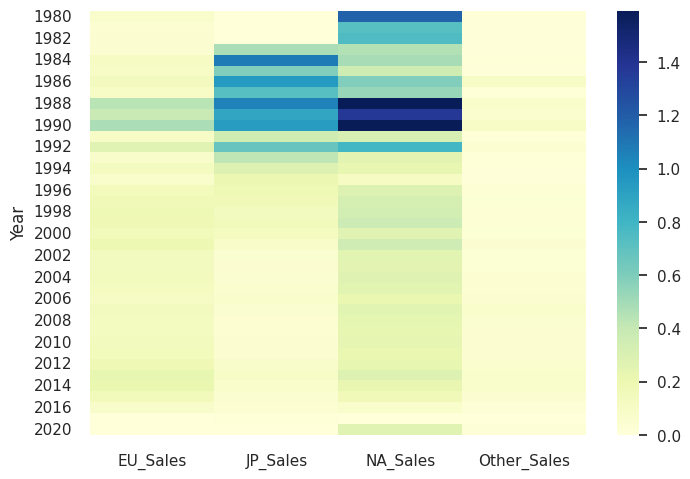

In [29]:
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
pivot_table = pd.pivot_table(df, values=cols, index=df['Year'].squeeze())
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.show()

Получаем, что регион лидирующий по продажам - Северная Америка, доля продаж которой почти 50%, и больше всего продаж было в 1984, 1985, 1989 годах

## Динамика продаж игр по платформам за каждый год

<ipython-input-30-67456c77d6ab>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['Year', 'Platform'], as_index=False).sum()


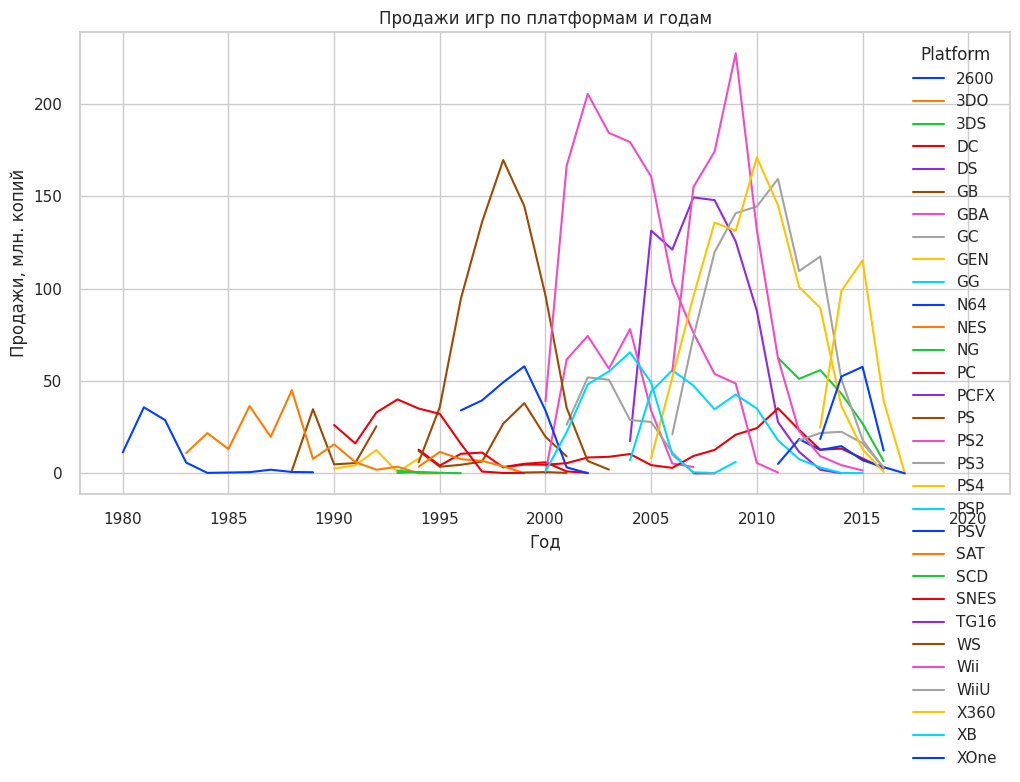

In [30]:
grouped = df.groupby(['Year', 'Platform'], as_index=False).sum()
pivot = pd.pivot_table(grouped, values='Global_Sales', index='Year', columns='Platform')
palette = sns.color_palette("bright", n_colors=len(pivot.columns))
pivot.plot(figsize=(12,6), color=palette)
plt.title('Продажи игр по платформам и годам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')
plt.show()

## Анализ названий игр

### Топ-10 самых встречающихся слов

In [31]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
word_list = []
for name in df['Name'].str.lower().str.replace('[^\w\s]','').str.replace('\d+', ''):
    word_list += word_tokenize(name)

<ipython-input-33-8b18f421c11e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  for name in df['Name'].str.lower().str.replace('[^\w\s]','').str.replace('\d+', ''):


In [34]:
stop_words = set(stopwords.words('english'))
word_list = [word for word in word_list if not word in stop_words]

In [35]:
fdist = FreqDist(word_list)
print(fdist.most_common(10))


[('world', 401), ('pro', 320), ('game', 308), ('ii', 299), ('super', 288), ('star', 243), ('ds', 237), ('soccer', 232), ('wars', 218), ('dragon', 215)]


### Облако слов

In [36]:
from wordcloud import WordCloud

In [39]:
stop_words = stopwords.words()

In [37]:
text = ' '.join(df['Name'])

(-0.5, 399.5, 199.5, -0.5)

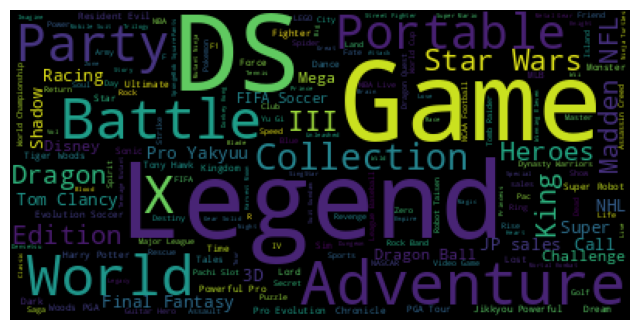

In [40]:
cloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(cloud)
plt.axis('off')